API key: 71F522PIQRFAFZZO

In [182]:
import os
import json
import requests

import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt


In [183]:
#! pip install bokeh

In [184]:
os.makedirs("data", exist_ok=True)
os.makedirs("visualisations", exist_ok=True)

intraday data

In [185]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=GME&outputsize=full&interval=60min&apikey=71F522PIQRFAFZZO'
r = requests.get(url)
gme_intraday_data = r.json()

with open("data/gme_intraday_data.json", "w") as f:
    json.dump(gme_intraday_data, f)

In [186]:
# First, the JSON data was read into a DataFrame
gme_df_uploaded = pd.read_json('data/gme_intraday_data.json')

# Extracting the time series data from the 'Time Series (60min)' column
time_series_data = gme_df_uploaded['Time Series (60min)'].dropna().to_dict()

# Creating a new DataFrame with the structured data
gme_transformed_df = pd.DataFrame.from_dict(time_series_data, orient='index')
gme_transformed_df.reset_index(inplace=True)
gme_transformed_df.rename(columns={'index': 'Date/Time'}, inplace=True)

# Displaying the first few rows of the transformed DataFrame
gme_transformed_df.head()


,Date/Time,1. open,2. high,3. low,4. close,5. volume
0,2023-12-06 19:00:00,14.8400,14.8400,13.8500,13.9600,290329
1,2023-12-06 18:00:00,14.3700,14.8400,14.3700,14.4200,179111
2,2023-12-06 17:00:00,14.3800,14.8400,14.3500,14.3700,222513
3,2023-12-06 16:00:00,14.8400,15.5600,14.0000,14.3980,1915840
4,2023-12-06 15:00:00,14.8700,14.9400,14.6400,14.8300,2175783


daily data

In [187]:
# File path for the JSON data
file_path = "data/gme_daily_data.json"

# Check if the file already exists
if not os.path.exists(file_path):
    # Fetch the data only if the file does not exist
    url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=GME&outputsize=full&apikey=71F522PIQRFAFZZO'
    response = requests.get(url)
    gme_daily_data = response.json()

    # Save the data to a JSON file
    with open(file_path, "w") as file:
        json.dump(gme_daily_data, file)

In [188]:
# Reading the JSON file
gme_daily_data_df = pd.read_json('data/gme_daily_data.json')

# Extracting the relevant time series data
time_series_daily_data = gme_daily_data_df['Time Series (Daily)'].dropna().to_dict()

# Creating a new DataFrame with the structured data
gme_daily_transformed_df = pd.DataFrame.from_dict(time_series_daily_data, orient='index')
gme_daily_transformed_df.reset_index(inplace=True)
gme_daily_transformed_df.rename(columns={'index': 'Date', '1. open': 'Open', '2. high': 'High', '3. low': 'Low', '4. close': 'Close', '5. volume': 'Volume'}, inplace=True)
gme_daily_transformed_df_sorted = gme_daily_transformed_df.sort_index()

# Displaying the first few rows of the transformed DataFrame
gme_daily_transformed_df_sorted.head()




,Date,Open,High,Low,Close,Volume
0,2023-11-24,12.2200,12.4100,12.1750,12.2000,1232474
1,2023-11-22,12.5600,12.7100,12.1901,12.2900,2362461
2,2023-11-21,12.6500,12.7200,12.2550,12.5500,3710097
3,2023-11-20,13.0000,13.2000,12.8000,12.8000,2301584
4,2023-11-17,12.5200,13.0550,12.5200,13.0300,3422596


Changing datatypes

In [189]:
gme_daily_transformed_df = gme_daily_transformed_df.astype({
    'Date': 'datetime64[ns]',
    'Open': 'float',
    'High': 'float',
    'Low': 'float',
    'Close': 'float',
    'Volume': 'int'
})

gme_daily_transformed_df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int32
dtype: object

Filtering dataframe to only include dates in the relevant period

In [190]:
# Filtering the DataFrame to include only data from December 2020 to April 2021 and creating a copy
gme_jan_apr2021_df = gme_daily_transformed_df[(gme_daily_transformed_df['Date'] >= '2021-01-01') & (gme_daily_transformed_df['Date'] <= '2021-04-01')].copy()

Plotting Close price against Date - PRACTICE

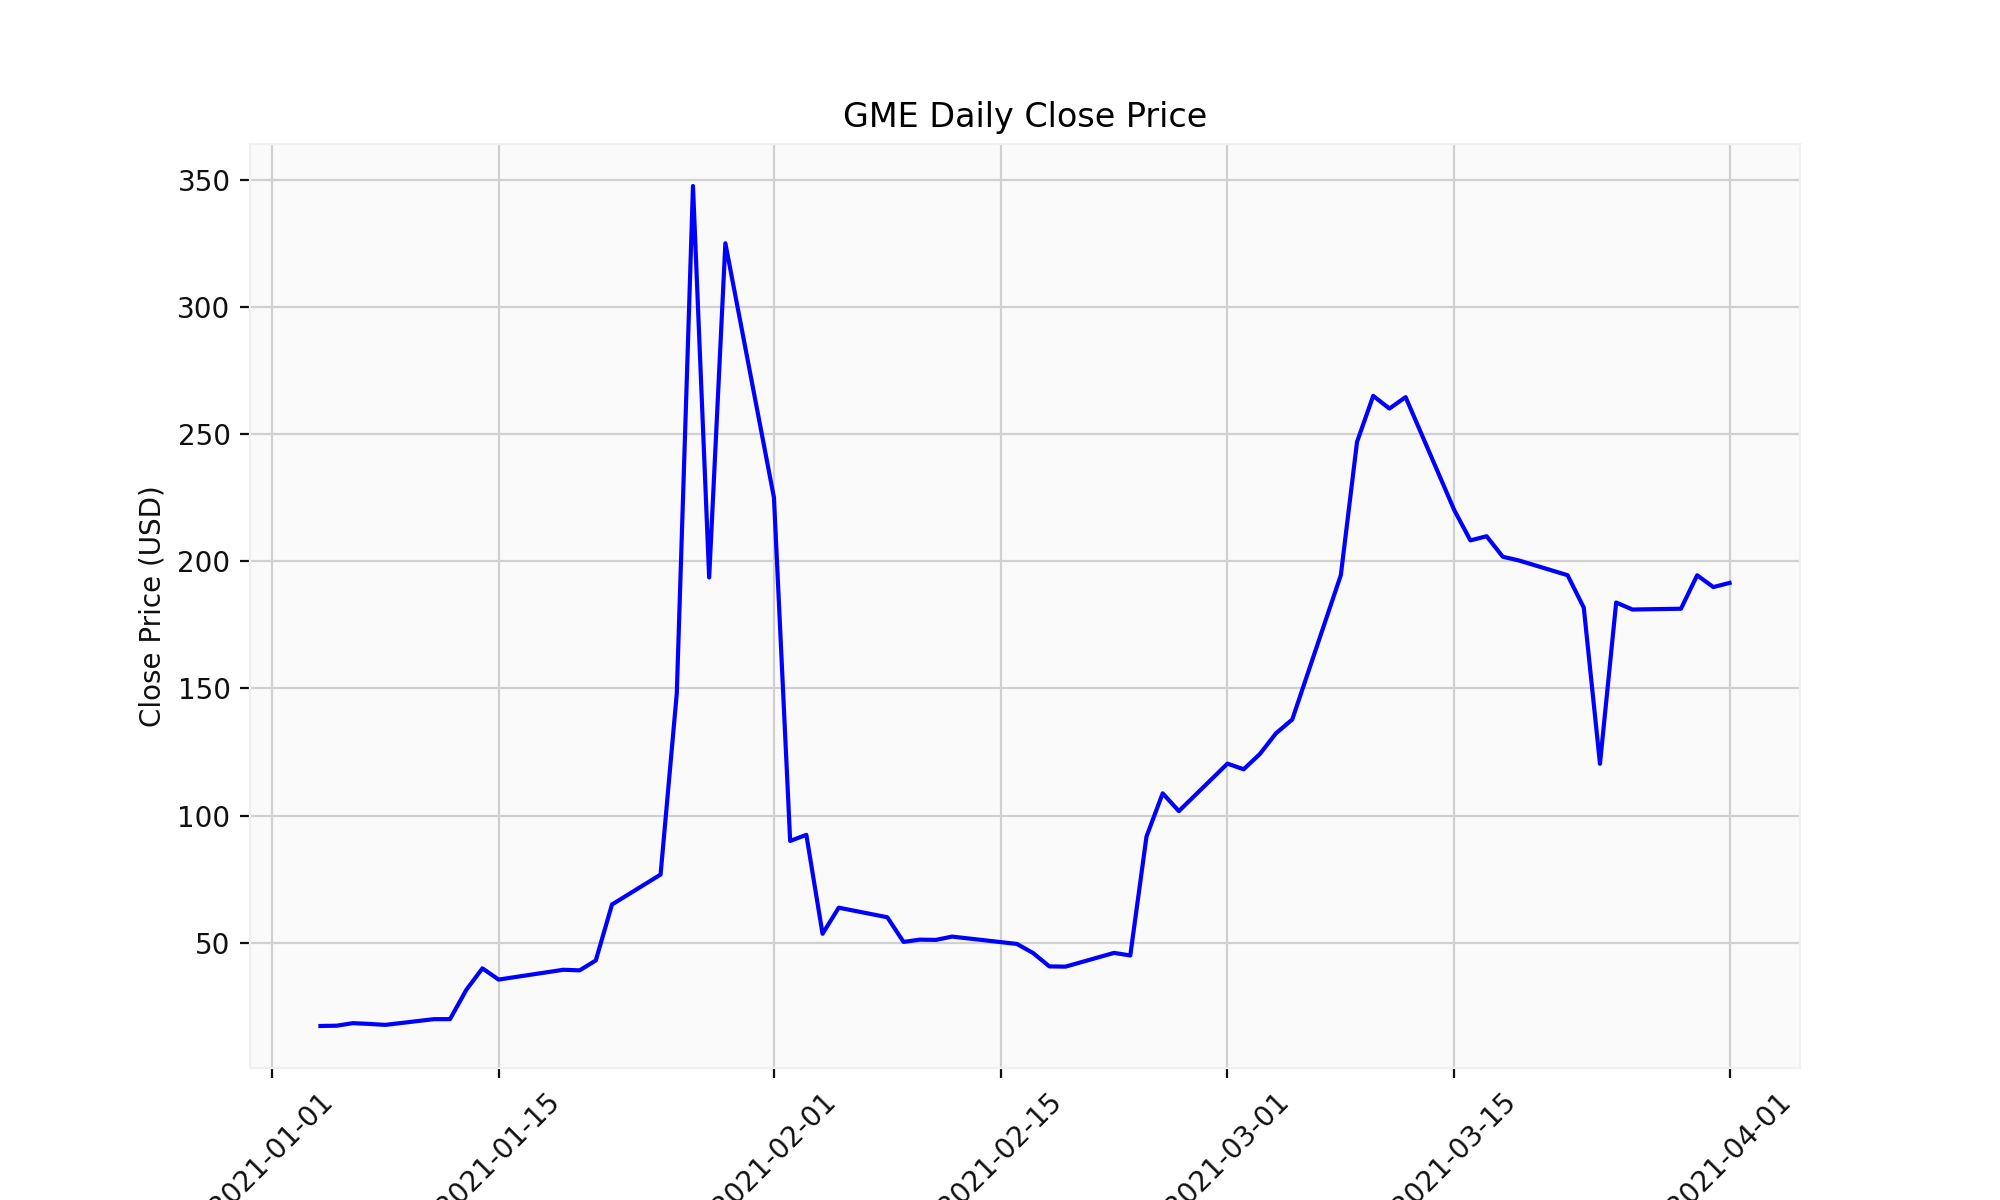

In [191]:
plt.figure(figsize=(10, 6))
plt.plot(gme_jan_apr2021_df['Date'], gme_jan_apr2021_df['Close'], color='blue')
plt.title('GME Daily Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Plotting a Candlestick Chart of GME Stock Price during the Gamestop short squeeze

In [192]:
# Ensure 'Date' is the index
gme_jan_apr2021_df.set_index('Date', inplace=True)

# Sorting the DataFrame by 'Date' in ascending order
gme_jan_apr2021_df.sort_index(inplace=True)

# Plotting the OHLC candlestick chart
mpf.plot(gme_jan_apr2021_df, 
         type='candle', 
         style='yahoo', 
         volume=True, 
         #tight_layout=True,
         datetime_format='%b %d, %Y',
         xrotation=45,
         title='GME Stock Price (Dec 2020-Apr 2021)',
         savefig='visualisations/gme_stock_price_candlestick_chart.png')


In [193]:
df_data1 = pd.read_csv('./data/reddit_data/Submissions_2021-01_FilteredBySubreddit_GME.csv')
df_data2 = pd.read_csv('./data/reddit_data/Submissions_2021-02_FilteredBySubreddit_GME.csv')
df_data3 = pd.read_csv('./data/reddit_data/Submissions_2021-03_FilteredBySubreddit_GME.csv')

df_all_data = pd.concat([df_data1, df_data2, df_data3], axis = 0,
                        ignore_index=True)

In [194]:
df_all_data.tail()

,submission_id,redditor_name,created_at,title,text,subreddit,permalink,attachment,flair,score,num_comments,edited
1059845,mhj0xa,MoRaLoSeVisH_13,2021-04-01T00:57:18,"Soon , fellow 🦍🦍🦍",NaN,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,{'jpg': 'https://i.redd.it/m8to12bkcgq61.jpg'},"{'link': 'Loss', 'author': None}",{'2021-06-11T22:41:01': 1},{'2021-06-11T22:41:01': 1},False
1059846,mhj0yj,[deleted],2021-04-01T00:57:22,Miley Cryus giving away $50 of free stock via ...,[removed],wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,NaN,"{'link': 'Discussion', 'author': None}",{'2021-06-11T22:41:01': 1},{'2021-06-11T22:41:01': 0},False
1059847,mhj103,lexmark0331,2021-04-01T00:57:26,HOFV Mega squeeze Opportunity,NaN,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,{'jpg': 'https://i.redd.it/vca4pnalcgq61.jpg'},"{'link': 'DD', 'author': None}",{'2021-06-11T22:41:01': 1},{'2021-06-11T22:41:01': 1},False
1059848,mhj272,chefthmst1983,2021-04-01T00:59:33,So what happened end of day on the DOW...hell ...,NaN,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,{'jpg': 'https://i.redd.it/n3oh1tvycgq61.jpg'},"{'link': 'Discussion', 'author': None}",{'2021-06-11T22:41:03': 1},{'2021-06-11T22:41:03': 0},False
1059849,mhj29n,KingMacias1,2021-04-01T00:59:41,We made it to Vice News you dirty apes 🦍,NaN,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,{'jpg': 'https://i.redd.it/wygxtrdzcgq61.jpg'},"{'link': 'News', 'author': None}",{'2021-06-11T22:41:03': 1},{'2021-06-11T22:41:03': 1},False


Processing dataframe

In [195]:
# Remove curly brackets from num_comments and score columns
df_all_data['num_comments'] = df_all_data['num_comments'].str.replace('[{}]'.format(''.join(['{}'])), '', regex=True)
df_all_data['score'] = df_all_data['score'].str.replace('[{}]'.format(''.join(['{}'])), '', regex=True)


# Remove date and time from num_comments and score columns
df_all_data['num_comments'] = df_all_data['num_comments'].str.split(':').str[-1].str.strip()
df_all_data['score'] = df_all_data['score'].str.split(':').str[-1].str.strip()


# Convert num_comments and score columns to integers
df_all_data['num_comments'] = df_all_data['num_comments'].astype(int)
df_all_data['score'] = df_all_data['score'].astype(int)


df_all_data['created_at'] = pd.to_datetime(df_all_data['created_at'])
# Extract only the date part
df_all_data['created_at'] = df_all_data['created_at'].dt.normalize()


In [196]:
df_all_data.tail()
df_all_data.dtypes

submission_id            object
redditor_name            object
created_at       datetime64[ns]
title                    object
text                     object
subreddit                object
permalink                object
attachment               object
flair                    object
score                     int32
num_comments              int32
edited                     bool
dtype: object

Groupby - keep looking into

In [197]:
df_all_data.rename(columns={'created_at': 'Date'}, inplace=True)
df_grouped = df_all_data.groupby('Date')

df_grouped = df_all_data.groupby('Date').size().reset_index(name='Post_Count')

df_comments_count = df_all_data.groupby('Date')['num_comments'].sum().reset_index(name='Total_Comments')

# Merge 'df_grouped' with 'df_comments_count' on 'Date'
df_grouped = df_grouped.merge(df_comments_count, on='Date', how='left')

df_grouped


# Now, you can perform operations on each group
# For example, you can calculate the sum of 'score' and 'num_comments' for each date
#result = df_grouped[['score', 'num_comments']].sum()

# The result DataFrame will have 'created_at' date as the index and sum of 'score' and 'num_comments' for each date
#print(result)

,Date,Post_Count,Total_Comments
0,2021-01-01,589,45186
1,2021-01-02,625,11609
2,2021-01-03,613,25134
3,2021-01-04,1029,55169
4,2021-01-05,965,65804
...,...,...,...
86,2021-03-28,1178,30131
87,2021-03-29,2065,85797
88,2021-03-30,2105,91976
89,2021-03-31,2147,82231


In [198]:
merged_df = df_grouped.merge(gme_jan_apr2021_df, on='Date', how='outer')
merged_df

,Date,Post_Count,Total_Comments,Open,High,Low,Close,Volume
0,2021-01-01,589,45186,NaN,NaN,NaN,NaN,NaN
1,2021-01-02,625,11609,NaN,NaN,NaN,NaN,NaN
2,2021-01-03,613,25134,NaN,NaN,NaN,NaN,NaN
3,2021-01-04,1029,55169,19.00,19.1000,17.1500,17.25,10022474.0
4,2021-01-05,965,65804,17.35,18.0765,17.2300,17.37,4961457.0
...,...,...,...,...,...,...,...,...
86,2021-03-28,1178,30131,NaN,NaN,NaN,NaN,NaN
87,2021-03-29,2065,85797,180.75,193.9200,173.5100,181.30,10042175.0
88,2021-03-30,2105,91976,187.50,204.3000,182.0000,194.46,17094924.0
89,2021-03-31,2147,82231,197.50,199.4600,187.1102,189.82,8393834.0


In [199]:
cleaned_df = merged_df.dropna()
cleaned_df['Volume'] = cleaned_df['Volume'].astype(int)
# Remove the last row using .iloc
cleaned_df = cleaned_df.iloc[:-1]
cleaned_df

C:\Users\annaj\AppData\Local\Temp\ipykernel_26344\2409377096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Date,Post_Count,Total_Comments,Open,High,Low,Close,Volume
3,2021-01-04,1029,55169,19.00,19.1000,17.1500,17.25,10022474
4,2021-01-05,965,65804,17.35,18.0765,17.2300,17.37,4961457
5,2021-01-06,1225,77419,17.34,18.9800,17.3300,18.36,6056248
6,2021-01-07,1399,68127,18.47,19.4500,18.0200,18.08,6129276
7,2021-01-08,1551,95624,18.18,18.3000,17.0800,17.69,6481960
...,...,...,...,...,...,...,...,...
83,2021-03-25,3493,146707,123.49,187.5000,116.9000,183.75,49926442
84,2021-03-26,2986,148208,197.68,218.9344,163.2600,181.00,37430672
87,2021-03-29,2065,85797,180.75,193.9200,173.5100,181.30,10042175
88,2021-03-30,2105,91976,187.50,204.3000,182.0000,194.46,17094924


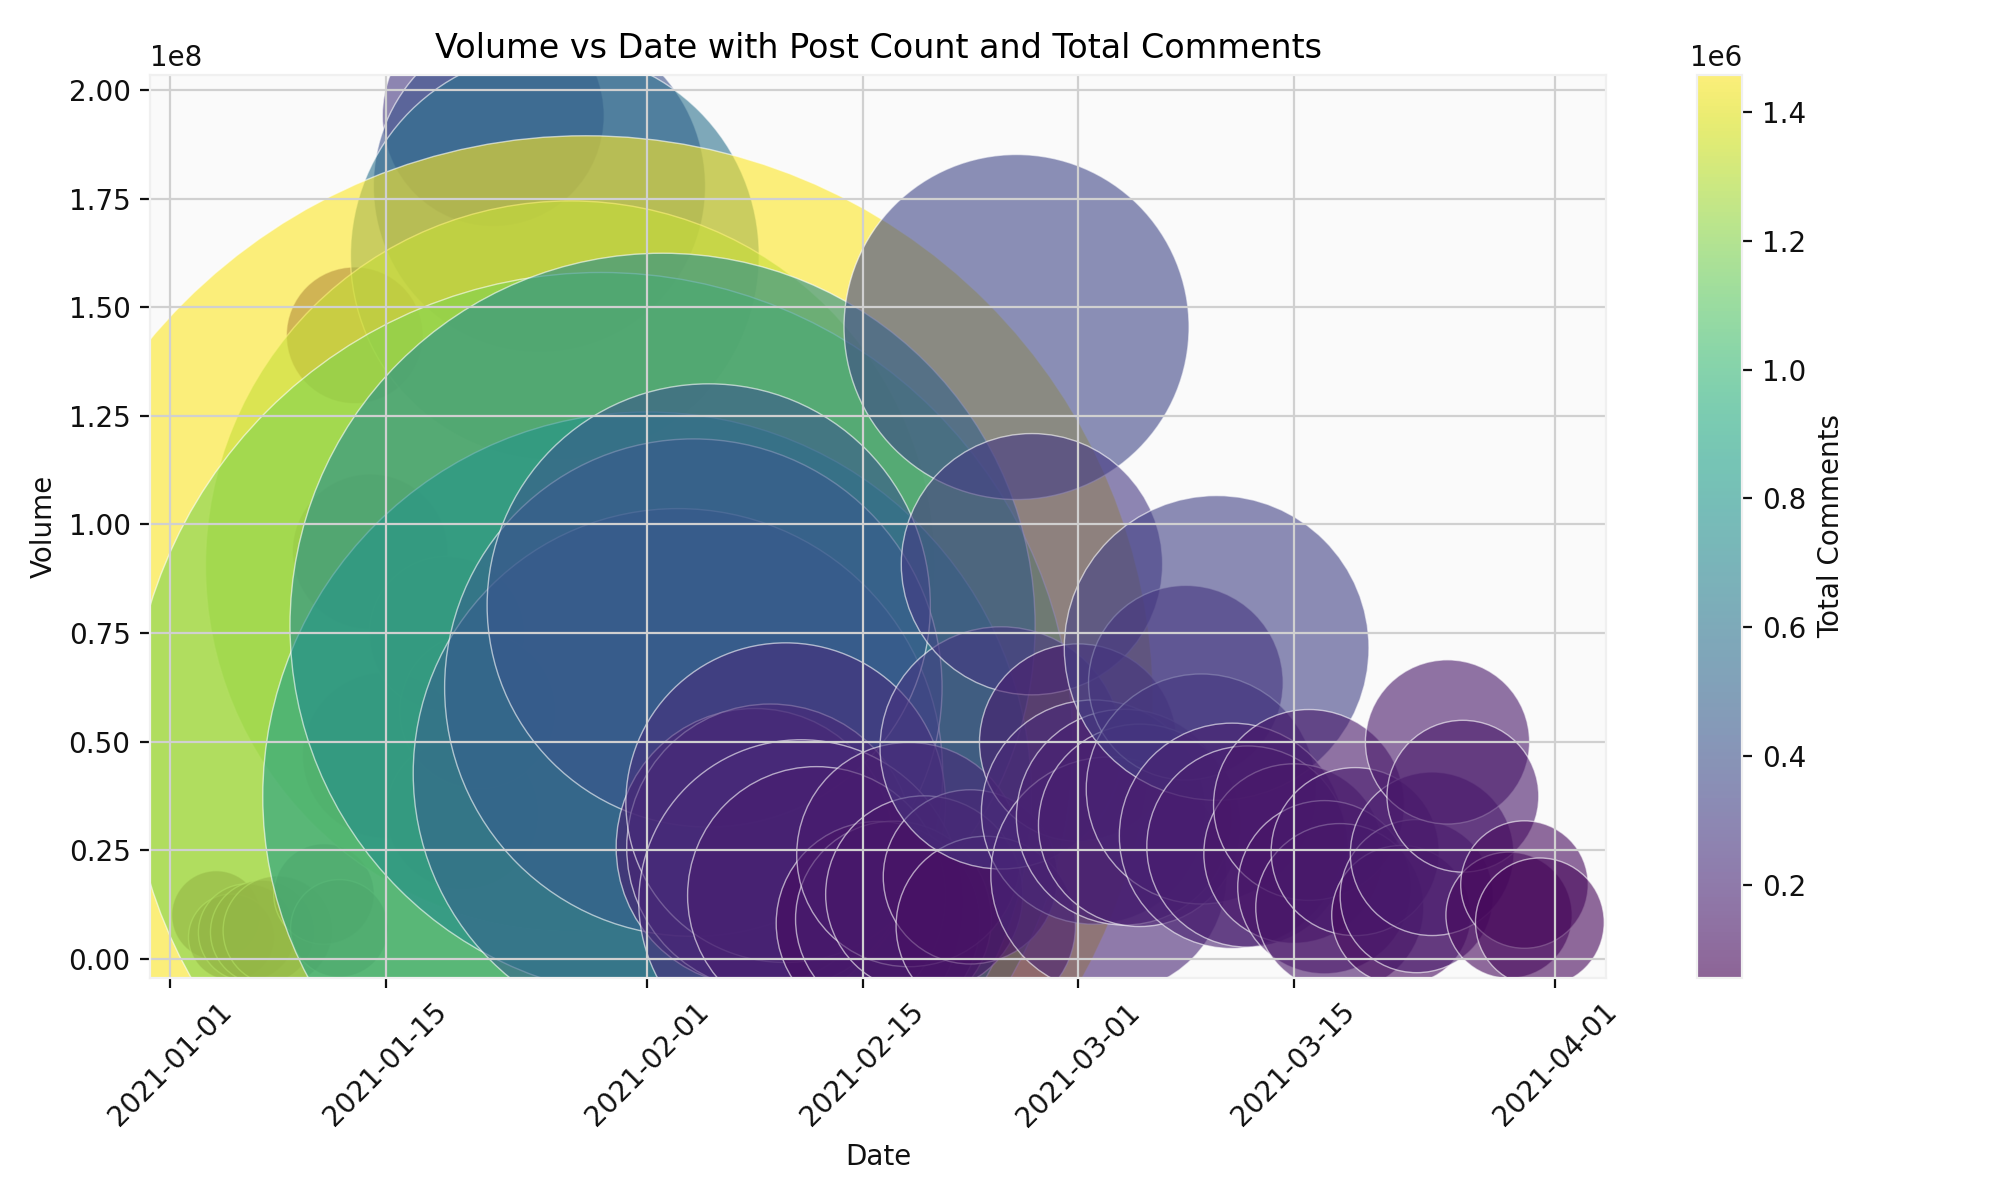

In [200]:
import matplotlib.pyplot as plt

# Creating the plot directly with matplotlib

# Converting 'Date' to datetime for plotting
cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'])

# Setting the size of the plot
plt.figure(figsize=(10, 6))

# Scatter plot: 'Post_Count' as size, 'Total_Comments' as color
scatter = plt.scatter(cleaned_df['Date'], cleaned_df['Volume'], 
                      s=cleaned_df['Post_Count'],  # size of points
                      c=cleaned_df['Total_Comments'],  # color of points
                      cmap='viridis', alpha=0.6, edgecolors='w', linewidth=0.5)

# Adding the color bar
plt.colorbar(scatter, label='Total Comments')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume vs Date with Post Count and Total Comments')

# Rotating the date labels for better visibility
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


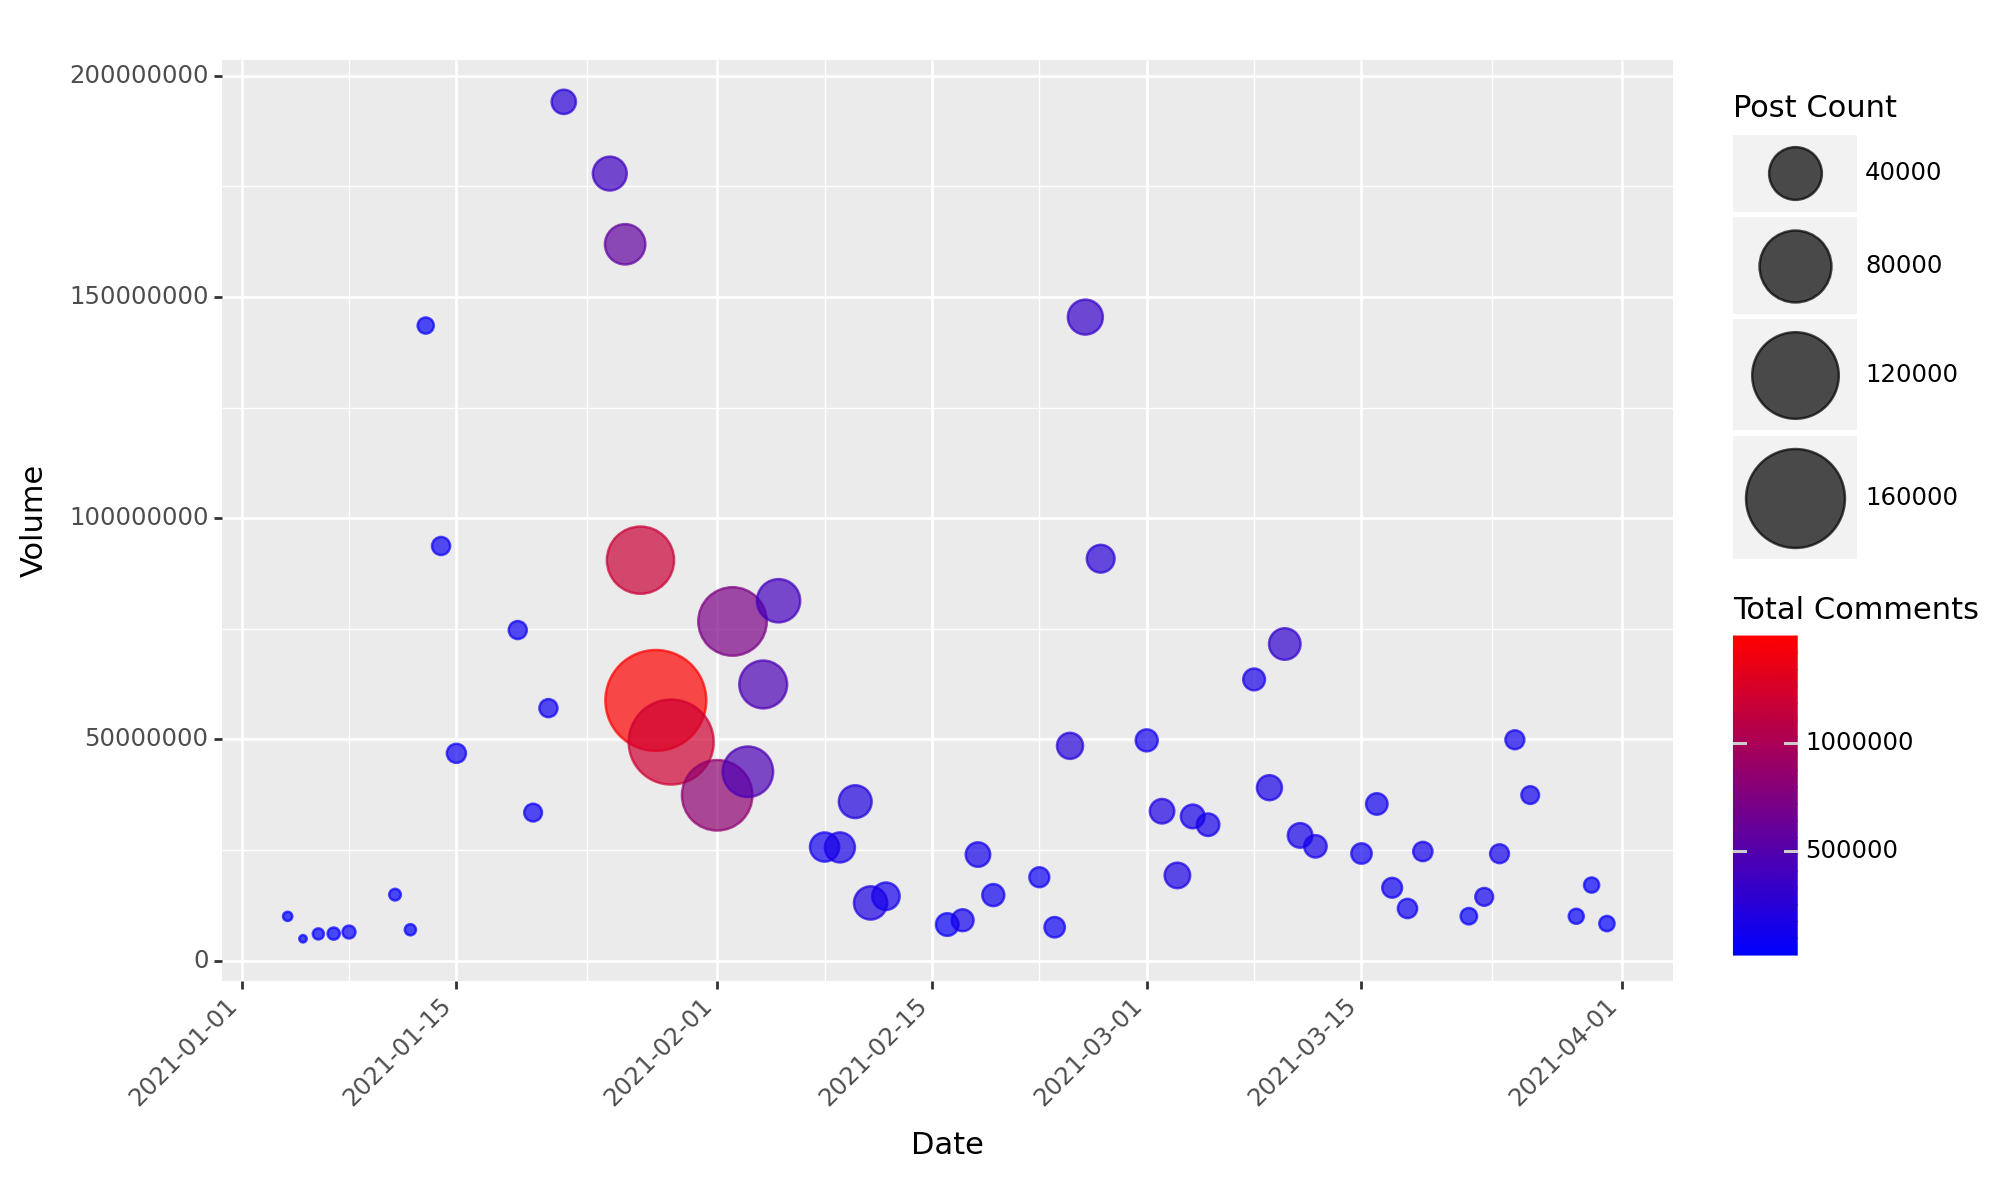

In [201]:
from plotnine import ggplot, aes, geom_point, scale_size, scale_colour_gradient, theme, element_text
from plotnine import labs

plot = (
    ggplot(cleaned_df, aes('Date', 'Volume', size='Post_Count', color='Total_Comments')) +
    geom_point(alpha=0.7) +  # Removed stroke for compatibility
    scale_size(range=(1, 20)) +  # Adjust size range as needed
    scale_colour_gradient(low="blue", high="red") +  # Correct function name
    labs(x='Date', y='Volume', color='Total Comments', size='Post Count') +
    theme(
        axis_text_x=element_text(angle=45, hjust=1),  # Correct usage of element_text
        figure_size=(10, 6)  # Set figure size
    )
)

print(plot)


Volume, Post count and Comment count ** confused about which variables go where

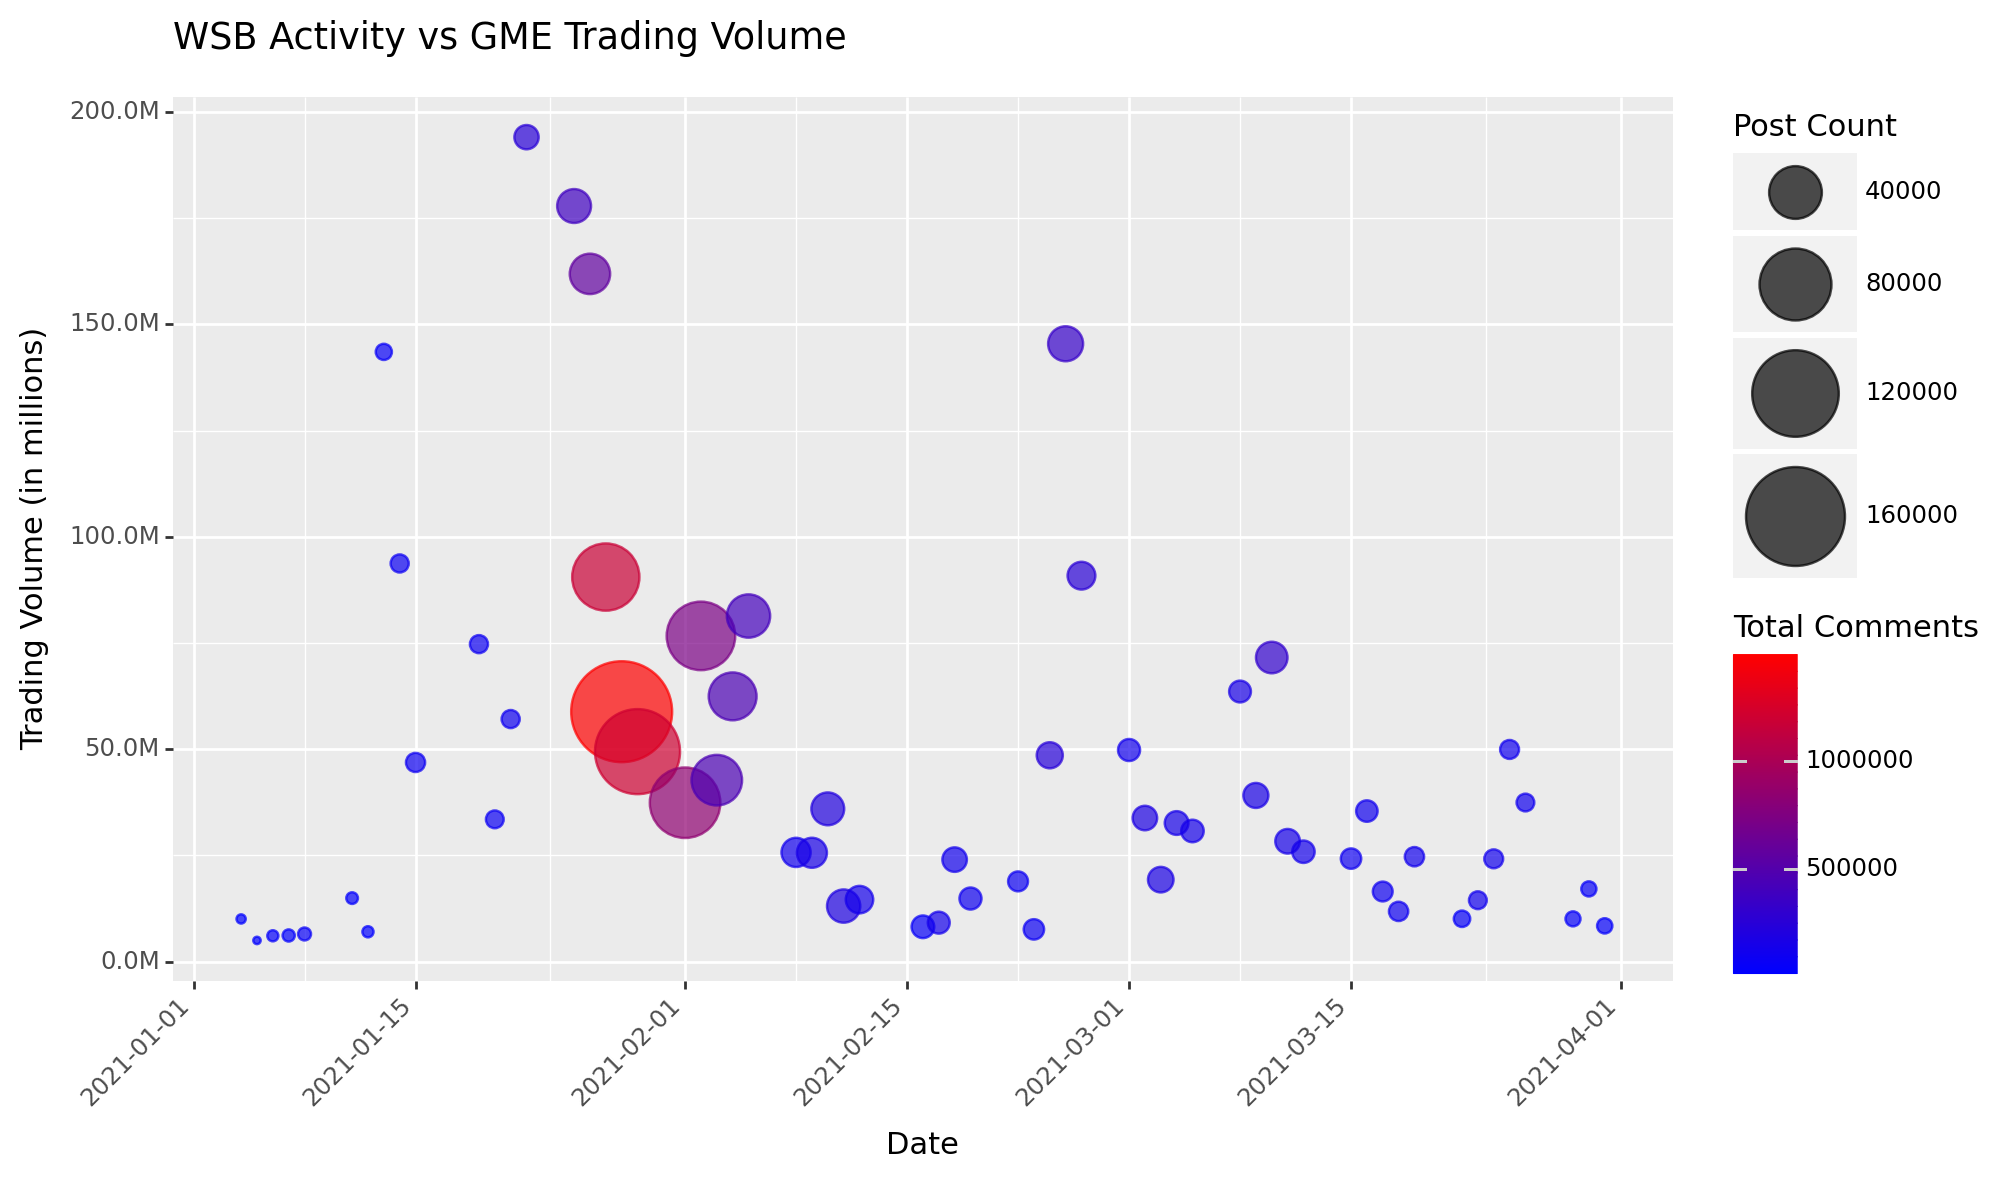

In [202]:
from plotnine import scale_y_continuous, geom_line

plot = (
    ggplot(cleaned_df, aes('Date', 'Volume', size='Post_Count', color='Total_Comments')) +
    geom_point(alpha=0.7, stroke=0.5) +
    #geom_line(aes(y='Close'), color='black', size=1) +  # Adding a line plot for the 'Close' price
    scale_size(range=(1, 20)) +
    scale_colour_gradient(low="blue", high="red") +
    scale_y_continuous(labels=lambda l: ['{:.1f}M'.format(v / 1e6) for v in l]) +  # Format y-axis labels
    labs(
        x='Date',
        y='Trading Volume (in millions)',
        color='Total Comments',
        size='Post Count',
        title='WSB Activity vs GME Trading Volume'
    ) +
    theme(
        axis_text_x=element_text(angle=45, hjust=1),
        figure_size=(10, 6)
    )
)

print(plot)


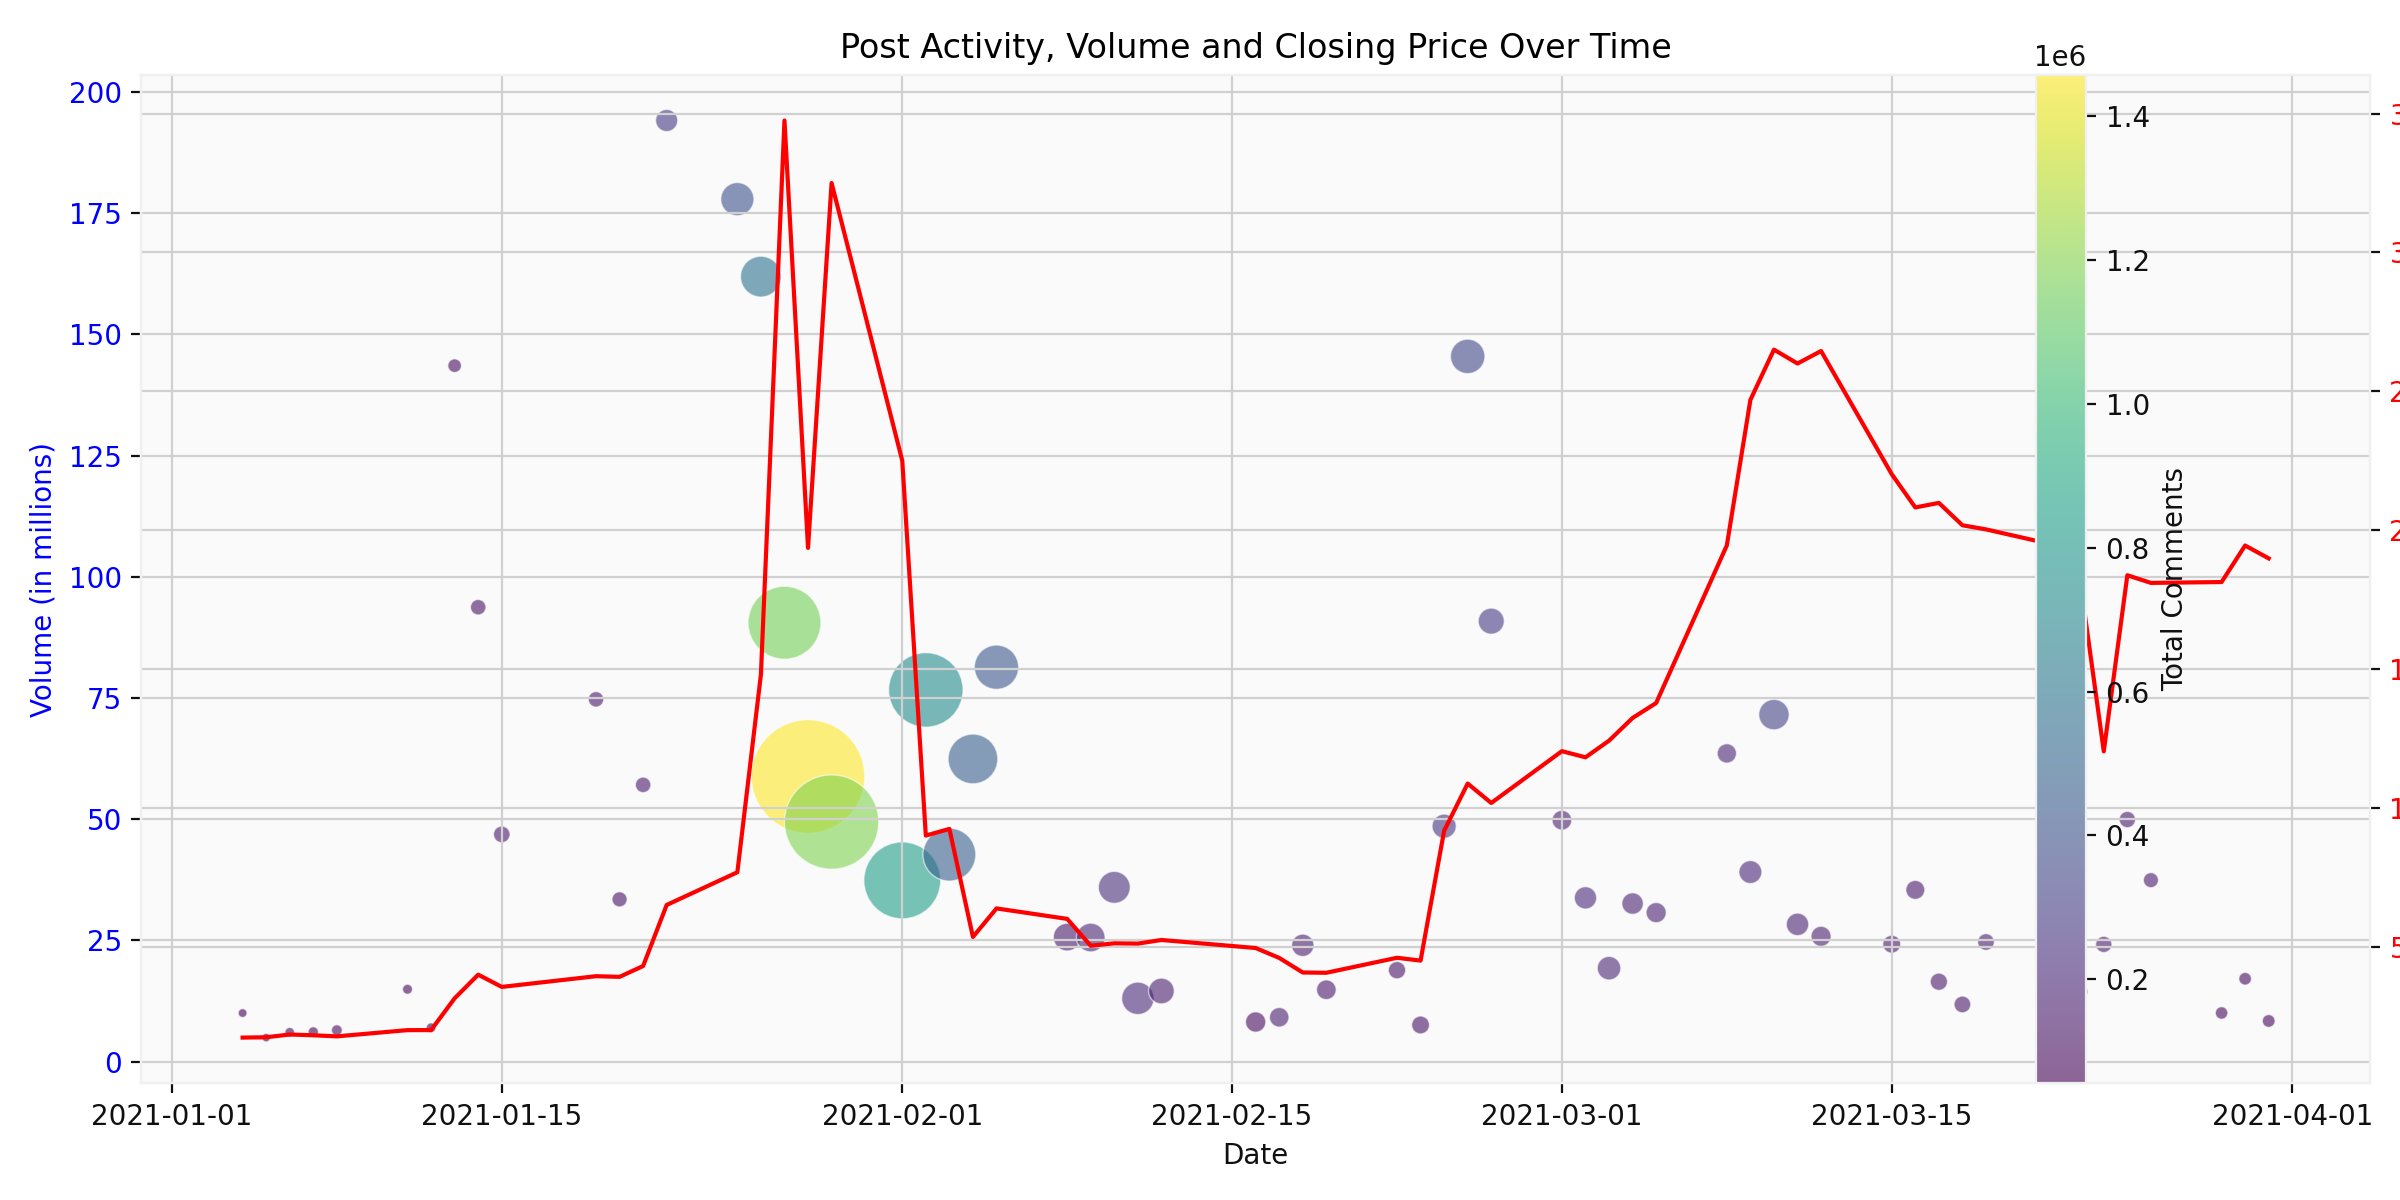

In [203]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'cleaned_df' is already loaded and contains the relevant columns

# Convert the 'Date' column to datetime if it isn't already
cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'])

# Create a new figure and a left axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the Volume as a scatter plot on the left y-axis
scatter = ax1.scatter(cleaned_df['Date'], cleaned_df['Volume']/1e6, 
                      c=cleaned_df['Total_Comments'], 
                      cmap='viridis', alpha=0.6, edgecolors='w', linewidth=0.5, 
                      s=cleaned_df['Post_Count']/100)  # Size scaled down for visibility

# Create the right y-axis with a shared x-axis
ax2 = ax1.twinx()

# Plot the Close price as a line plot on the right y-axis
ax2.plot(cleaned_df['Date'], cleaned_df['Close'], 'r-')

# Set the y-axis label for the left y-axis
ax1.set_ylabel('Volume (in millions)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Set the y-axis label for the right y-axis
ax2.set_ylabel('Close Price', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Set the x-axis label
ax1.set_xlabel('Date')

# Set the title of the plot
plt.title('Post Activity, Volume and Closing Price Over Time')

# Rotate the date labels for better readability
plt.xticks(rotation=45)

# Add a color bar for the scatter plot
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label('Total Comments')

# Show plot
plt.tight_layout()
plt.show()


In [218]:
from bokeh.plotting import figure, show
from bokeh.models import LinearAxis, Range1d, ColumnDataSource, LinearColorMapper, ColorBar, NumeralTickFormatter
from bokeh.transform import transform
from bokeh.io import output_notebook
import pandas as pd

# Assuming 'cleaned_df' is a pandas DataFrame with your data

# Convert 'Date' to datetime if it's not already
cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'])

# Apply a scaling factor to 'Post_Count' to get a suitable size for the circles
scaling_factor = 0.1  # Example scaling factor, adjust as needed
cleaned_df['circle_sizes'] = cleaned_df['Post_Count'] * scaling_factor

# Create a color mapper for 'Total_Comments'
color_mapper = LinearColorMapper(palette="Viridis256", low=cleaned_df['Total_Comments'].min(), high=cleaned_df['Total_Comments'].max())

# Create a data source including the new 'size' column
source = ColumnDataSource(cleaned_df)

# Bokeh uses its own output functions, you can use output_file to save to a file or output_notebook to display inline in a Jupyter notebook
output_notebook()

# Create a new figure
p = figure(width=1000, height=500, x_axis_type='datetime')

# Set the y_range for the Volume axis to end at 250 million
p.y_range = Range1d(start=0, end=300)

# Make sure to use the 'size' column for the size of the circles
#p.circle('Date', 'Volume', size='circle_sizes', source=source, color=transform('Total_Comments', color_mapper), alpha=0.8, legend_label='Volume (in millions)')
# Add circle glyphs to the figure
p.circle(x='Date', y='Volume', size='circle_sizes', source=source, color=transform('Total_Comments', color_mapper), alpha=0.7)
# Add the primary y-axis (left side) for Volume
p.yaxis.axis_label = 'Volume (in millions)'

# Specify the range for the secondary y-axis (right side)
p.extra_y_ranges = {'Close Price': Range1d(start=cleaned_df['Close'].min(), end=cleaned_df['Close'].max())}

# Add the secondary y-axis (right side) for Close Price
p.line('Date', 'Close', source=source, color='red', y_range_name='Close Price', legend_label='Close Price')
p.add_layout(LinearAxis(y_range_name='Close Price', axis_label='Close Price'), 'right')

# Add color bar for 'Total_Comments'
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0,0), title='Total Comments', formatter=NumeralTickFormatter(format="0,0"))
p.add_layout(color_bar, 'right')

# Add legends
p.legend.location = 'top_left'

# Show the result
show(p)


Loading BokehJS ...

In [216]:
# Check the range of volume data to ensure it's within the y-axis range
print(cleaned_df['Volume'].min(), cleaned_df['Volume'].max())



4961457.0 194084194.0


In [206]:
cleaned_df['Post_Count'].max()

166996

In [220]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, LinearColorMapper, ColorBar, NumeralTickFormatter
from bokeh.transform import transform
from bokeh.models.tools import HoverTool
import pandas as pd

# Ensure your dataframe is sorted by date if it's not already
cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'])
cleaned_df.sort_values('Date', inplace=True)

# Create a ColumnDataSource from the dataframe
source = ColumnDataSource(cleaned_df)

# Create a color mapper for total comments with a color bar
color_mapper = LinearColorMapper(palette="Viridis256", low=cleaned_df['Total_Comments'].min(), high=cleaned_df['Total_Comments'].max())

# Define a size mapping based on 'Post_Count', here we scale the 'Post_Count' values to a range of 6 to 30
# Adjust this scaling factor to suit the size of your plot or preference
scale_factor = 0.001  # This is a scaling factor for the size
max_size = 50
min_size = 1
cleaned_df['size'] = cleaned_df['Post_Count'] * scale_factor
cleaned_df['size'] = cleaned_df['size'].clip(lower=min_size, upper=max_size)

# Update the source with the new size data
source.data['size'] = cleaned_df['size']

# Create a figure object
p = figure(width=1000, height=600, x_axis_type="datetime", title="WSB Activity vs GME Trading Volume")

# Add circle glyphs to the figure
p.circle(x='Date', y='Volume', size='size', source=source, color=transform('Total_Comments', color_mapper), alpha=0.7)

# Add a color bar to the right of the plot
#color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0,0), title='Total Comments')
#p.add_layout(color_bar, 'right')
# Add color bar for 'Total_Comments'
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0,0), title='Total Comments', formatter=NumeralTickFormatter(format="0,0"))
p.add_layout(color_bar, 'right')

legend_sizes = [6, 18, 30]  # Example sizes
legend_labels = ['Low', 'Medium', 'High']  # Example labels

# Create a legend by adding invisible circles (visible in the legend only)
for size, label in zip(legend_sizes, legend_labels):
    p.circle(x=[], y=[], size=size, color='grey', alpha=0.7, legend_label=label)

# Customize the plot's legend
p.legend.title = 'Post Count'
p.legend.location = 'top_left'
p.legend.orientation = 'vertical'
p.legend.label_text_font_size = '8pt'
p.legend.spacing = 0

# Customize the plot
p.yaxis.formatter = NumeralTickFormatter(format="0.0a")
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Trading Volume (in millions)'

# Specify the range for the secondary y-axis (right side)
p.extra_y_ranges = {'Close Price': Range1d(start=cleaned_df['Close'].min(), end=cleaned_df['Close'].max())}

# Add the secondary y-axis (right side) for Close Price
p.line('Date', 'Close', source=source, color='red', y_range_name='Close Price', legend_label='Close Price')
p.add_layout(LinearAxis(y_range_name='Close Price', axis_label='Close Price'), 'right')

# Add hover tool
hover = HoverTool(tooltips=[("Date", "@Date{%F}"),
                            ("Volume", "@Volume"),
                            ("Post Count", "@Post_Count"),
                            ("Total Comments", "@Total_Comments")],
                  formatters={'@Date': 'datetime'})
p.add_tools(hover)

# Show the plot
show(p)


In [208]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, LinearColorMapper, ColorBar, NumeralTickFormatter, FixedTicker, Legend, LegendItem
from bokeh.transform import transform
from bokeh.models.tools import HoverTool
import pandas as pd

# Assuming 'cleaned_df' is your DataFrame and is already prepared with the 'Date' and 'size' fields

# Create a ColumnDataSource from the dataframe
source = ColumnDataSource(cleaned_df)

# Create a color mapper for total comments with a color bar
color_mapper = LinearColorMapper(palette="Viridis256", low=cleaned_df['Total_Comments'].min(), high=cleaned_df['Total_Comments'].max())

# Define a size mapping based on 'Post_Count', here we scale the 'Post_Count' values to a range of 6 to 30
# Adjust this scaling factor to suit the size of your plot or preference
max_size = 30
min_size = 6
scale_factor = max_size / cleaned_df['Post_Count'].max()  # This is a scaling factor for the size

# Add the scaled sizes to the data source
source.data['size'] = cleaned_df['Post_Count'] * scale_factor
source.data['size'] = source.data['size'].clip(lower=min_size, upper=max_size)

# Create a figure object
p = figure(width=800, height=400, x_axis_type="datetime", title="WSB Activity vs GME Trading Volume")

# Add circle glyphs to the figure
p.circle(x='Date', y='Volume', size='size', source=source, color=transform('Total_Comments', color_mapper), alpha=0.7)

# Add legend for sizes (manually create legend items)
legend_items = [
    LegendItem(label="Low", renderers=[p.circle(x=[], y=[], size=min_size, color="grey", alpha=0.7)]),
    LegendItem(label="Medium", renderers=[p.circle(x=[], y=[], size=(min_size+max_size)/2, color="grey", alpha=0.7)]),
    LegendItem(label="High", renderers=[p.circle(x=[], y=[], size=max_size, color="grey", alpha=0.7)])
]

# Create and add the custom legend
size_legend = Legend(items=legend_items, location="top_left", spacing=0, title="Post Count")
p.add_layout(size_legend, 'above')

# Add a color bar to the right of the plot
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, ticker=FixedTicker(ticks=[color_mapper.low, color_mapper.high]), formatter=NumeralTickFormatter(format="0,0"))
p.add_layout(color_bar, 'right')

# Customize the plot
p.yaxis.formatter = NumeralTickFormatter(format="0.0a")
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Trading Volume (in millions)'

# Add hover tool
hover = HoverTool(tooltips=[("Date", "@Date{%F}"),
                            ("Volume", "@Volume{0.0a}"),
                            ("Post Count", "@Post_Count"),
                            ("Total Comments", "@Total_Comments{0,0}")],
                  formatters={'@Date': 'datetime'})
p.add_tools(hover)

# Show the plot
show(p)


In [209]:
from bokeh.plotting import figure, show
from bokeh.io import curdoc
from bokeh.layouts import row, column
from bokeh.models import Slider, ColumnDataSource
from bokeh.transform import factor_cmap
import pandas as pd

# Load and preprocess data
# df_stocks = pd.read_csv('stocks.csv') # Load stock data
# df_reddit = pd.read_csv('reddit.csv') # Load reddit data

# Create a ColumnDataSource from your data
source_stocks = ColumnDataSource(cleaned_df)
source_reddit = ColumnDataSource(df_all_data)

# Create plots
p1 = figure(title="Stock Close Prices", x_axis_type='datetime')
p1.line('Date', 'Close', source=source_stocks, line_width=2)

p2 = figure(title="Reddit Post Scores", x_axis_type='datetime')
p2.vbar(x='created_at', top='score', source=source_reddit, width=0.9)

# Create widgets
slider = Slider(start=0, end=10, value=1, step=1, title="Slider")

# Define callback for widgets
def update_data(attrname, old, new):
    # Update the plot based on the slider
    scale = slider.value
    new_data = dict()
    new_data['Close'] = cleaned_df['Close'] * scale
    source_stocks.data = new_data

slider.on_change('value', update_data)

# Arrange plots and widgets in a layout
layout = column(row(slider), row(p1, p2))

# Add the layout to the current document
curdoc().add_root(layout)

# Run the server
# To run this, you would save it as a .py file and then run `bokeh serve --show mydashboard.py`


In [210]:
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, DatetimeTickFormatter, HoverTool
from bokeh.io import curdoc
import datetime

In [211]:
# Set 'Date' as the DataFrame index
#gme_jan_apr2021_df.set_index('Date', inplace=True)

# Create a ColumnDataSource for Bokeh plotting
source = ColumnDataSource(data=gme_jan_apr2021_df)

# Create the figure
p = figure(title="GME Daily Closing Prices (Dec 2020 - Apr 2021)", 
           x_axis_label='Date', y_axis_label='Close Price ($)', 
           x_axis_type='datetime', width=800, height=400)

# Add a line renderer with legend and line thickness
p.line(x='Date', y='Close', source=source, legend_label="Close Price", line_width=2)

# Updated format for the datetime axis
p.xaxis.formatter = DatetimeTickFormatter(
    days="%d %b %Y",
    months="%b %Y",
    years="%Y"
)

# Add a hover tool to the plot
hover = HoverTool(
    tooltips=[
        ('Date', '@Date{%F}'),  # Use the { } to format the date
        ('Close', '$@Close{0,0.00}')  # Use { } to format the close price
    ],
    formatters={
        '@Date': 'datetime',  # Use 'datetime' formatter for '@Date' field
    },
    mode='vline'  # Display a tooltip whenever the cursor is vertically in line with a glyph
)

p.add_tools(hover)

# Updated format for the datetime axis
p.xaxis.formatter = DatetimeTickFormatter(
    days="%d %b %Y",
    months="%b %Y",
    years="%Y"
)

output_notebook()
show(p)

Loading BokehJS ...

In [212]:
from bokeh.layouts import layout
from bokeh.models import Div, RangeSlider, Spinner
from bokeh.plotting import figure, show

# prepare some data
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [4, 5, 5, 7, 2, 6, 4, 9, 1, 3]

# create plot with circle glyphs
p = figure(x_range=(1, 9), width=500, height=250)
points = p.circle(x=x, y=y, size=30, fill_color="#21a7df")

# set up textarea (div)
div = Div(
    text="""
          <p>Select the circle's size using this control element:</p>
          """,
    width=200,
    height=30,
)

# set up spinner
spinner = Spinner(
    title="Circle size",
    low=0,
    high=60,
    step=5,
    value=points.glyph.size,
    width=200,
)
spinner.js_link("value", points.glyph, "size")

# set up RangeSlider
range_slider = RangeSlider(
    title="Adjust x-axis range",
    start=0,
    end=10,
    step=1,
    value=(p.x_range.start, p.x_range.end),
)
range_slider.js_link("value", p.x_range, "start", attr_selector=0)
range_slider.js_link("value", p.x_range, "end", attr_selector=1)

# create layout
layout = layout(
    [
        [div, spinner],
        [range_slider],
        [p],
    ],
)

# show result
show(layout)